# 2주차 미션

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/medical_201909.csv.zip", low_memory=False)
df.shape

(91335, 39)

### Q1 전국 시도별 약국수를 구해주세요!
* 상권업종소분류명이 약국인 것을 찾아 빈도수를 구해주세요. 이 때, value_counts, groupby, pivot_table 등 다양한 집계 방법을 통해 구해볼 수 있습니다. 각자 구하기 편한 방법을 통해 빈도수를 구합니다.

In [2]:
# 불러온 데이터의 요약정보 확인
# 컬럼을 비롯한 대략적인 정보확인

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  int64  
 20  대지구분코드

In [3]:
# 데이터 프레임 확인하기
# sample을 이용하여 '약국'을 도메인으로 갖는 column을 확ㅇ니
df.sample(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
48693,21778311,윤영근내과,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1129013600100160016017041,새서울신용협동조합,서울특별시 성북구 화랑로 95,136130.0,2751.0,NaN,2,NaN,127.042428,37.603268
17465,21124609,서울본정형외과,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,4613011500108740001020696,NaN,전라남도 여수시 신월로 735,550819.0,59756.0,NaN,NaN,NaN,127.720730,34.736014
69859,24997826,연세스타안과,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1171010500101740007009726,태문빌딩,서울특별시 송파구 백제고분로 365,138844.0,5616.0,NaN,5,NaN,127.106284,37.505257


In [4]:
# '시도명' column과 '상권업종소분류명' column을 불러와 그룹화
# value_counts()를 사용하여 시도별 약국수를 추출한다
df['시도명'][df['상권업종소분류명']=='약국'].value_counts()

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

In [5]:
# loc를 사용하여 추출
df_medical = df.loc[df["상권업종소분류명"] == "약국", "시도명"].value_counts()
df_medical

경기도        4510
서울특별시      3579
부산광역시      1130
경상남도       1017
인천광역시      1002
경상북도        915
대구광역시       870
전라북도        862
충청남도        830
전라남도        811
강원도         729
광주광역시       691
충청북도        648
대전광역시       603
울산광역시       362
제주특별자치도     226
세종특별자치시      99
Name: 시도명, dtype: int64

In [6]:
# groupby()를 사용하여 풀기
df[df['상권업종소분류명']=='약국'].groupby(['시도명'])['상권업종소분류명'].count()

시도명
강원도         729
경기도        4510
경상남도       1017
경상북도        915
광주광역시       691
대구광역시       870
대전광역시       603
부산광역시      1130
서울특별시      3579
세종특별자치시      99
울산광역시       362
인천광역시      1002
전라남도        811
전라북도        862
제주특별자치도     226
충청남도        830
충청북도        648
Name: 상권업종소분류명, dtype: int64

### Q2.여러분은 반려동물과 관련된 사업을 하는 스타트업에 취업을 하여 상권분석을 해달라는 요청을 받았습니다. 병원이나 약국은 인구나 유동인구가 많은 지역에 주로 위치하고 있습니다. 그렇다면 동물병원도 병원이나 약국이 많은 곳에 더 많이 있을까요?
* 빈도수를 구하고 시각화하여 동물병원이 어느 지역에 많은 지 분석해주세요!

In [7]:
# Q1과 동일한 문제 약국이 아닌 동물병원을 구하는 문제

df.loc[df['상권업종소분류명']=='동물병원', '시도명'].value_counts()

경기도        992
서울특별시      557
인천광역시      193
경상북도       165
경상남도       161
부산광역시      153
충청남도       131
대구광역시      119
전라북도       111
강원도         85
대전광역시       77
전라남도        77
충청북도        75
광주광역시       71
울산광역시       61
제주특별자치도     46
세종특별자치시     13
Name: 시도명, dtype: int64

<AxesSubplot: >

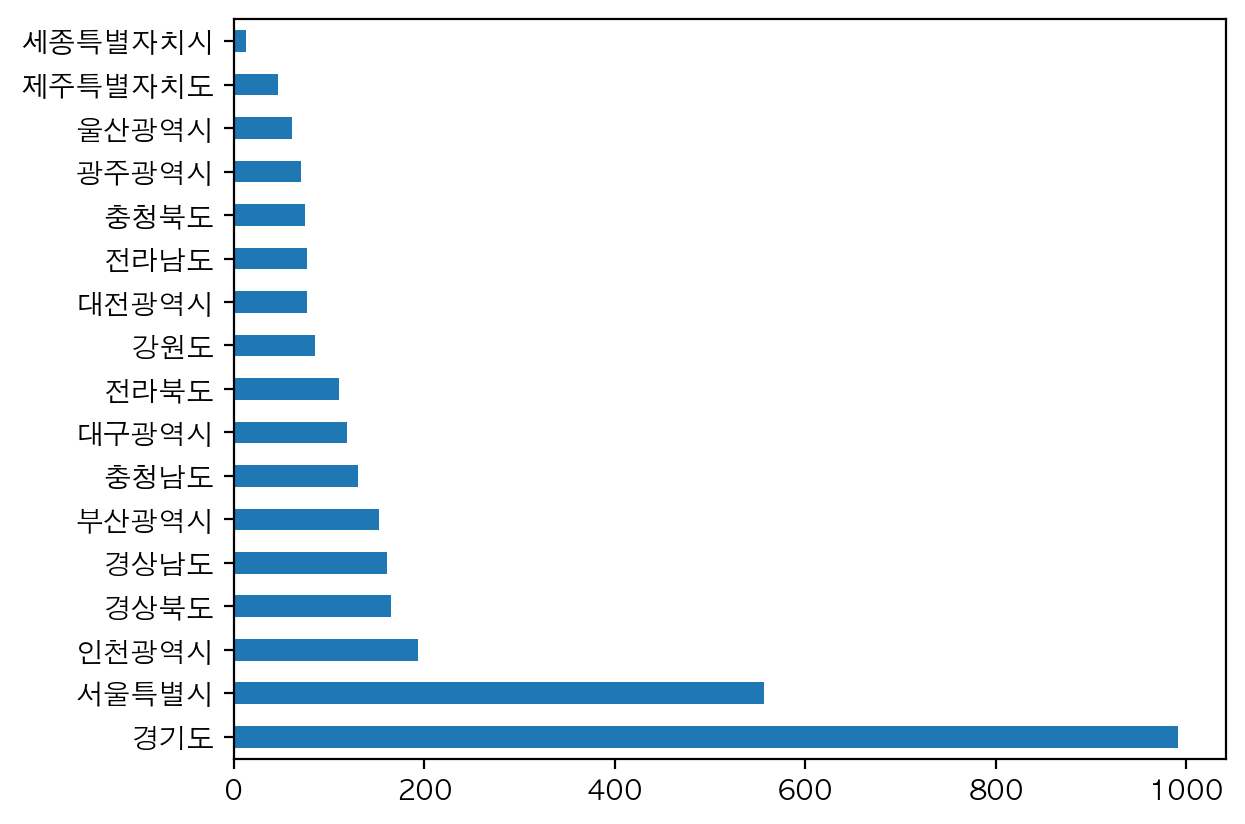

In [8]:
# 시각화 
# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
# 한글폰트 in mac
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

df_animal =df.loc[df['상권업종소분류명']=='동물병원', '시도명'].value_counts()

df_animal.plot.barh()

<AxesSubplot: >

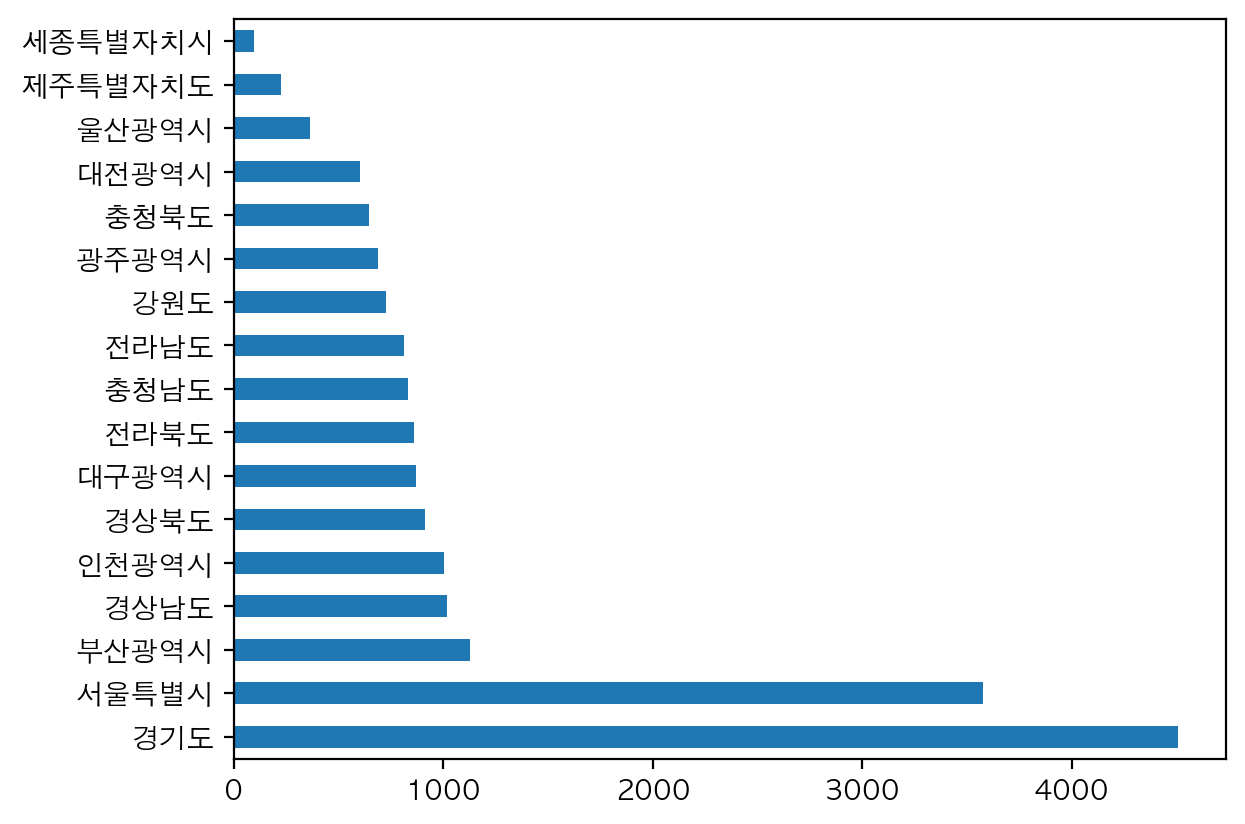

In [9]:
df_medical.plot.barh()

### 결론 : 동물병원도 약국처럼 유동인구가 많은 지역에 주로 위치

### Q3. 강남지역에는 다른 지역에 비해 피부과나 성형외과가 많아 보입니다. 실제로 해당 지역에 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 알아보겠습니다.
* 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구해주세요!
* 피부과 성형외과 수 / 전체병원 수 로 비율을 구해주세요!
* 비율이 높은 순서대로 정렬되게 구해주세요!
* 수업에서 사용한 같은 CSV 파일을 사용하며 다음의 결과가 나오도록 구합니다.
* 소숫점 두 번째짜리까지 출력하는 방법은 pandas round 로 검색해서 사용법을 알아보세요!


In [10]:
df.head(3)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19956873,하나산부인과,NaN,S,의료,S01,병원,S01B10,산부인과,Q86201,...,4127310900110810000010857,산호한양아파트,경기도 안산시 단원구 달미로 10,425764.0,15236.0,NaN,NaN,NaN,126.814295,37.336344
1,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270.0,6292.0,NaN,4,NaN,127.053198,37.488742
2,20152277,조정현신경외과의원,NaN,S,의료,S01,병원,S01B15,신경외과,Q86201,...,4139013200117400001017064,한라프라자,경기도 시흥시 중심상가로 178,429450.0,15066.0,NaN,NaN,NaN,126.734841,37.344955


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13406 entries, 1 to 91333
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     13406 non-null  int64  
 1   상호명        13406 non-null  object 
 2   지점명        156 non-null    object 
 3   상권업종대분류코드  13406 non-null  object 
 4   상권업종대분류명   13406 non-null  object 
 5   상권업종중분류코드  13406 non-null  object 
 6   상권업종중분류명   13406 non-null  object 
 7   상권업종소분류코드  13406 non-null  object 
 8   상권업종소분류명   13406 non-null  object 
 9   표준산업분류코드   12330 non-null  object 
 10  표준산업분류명    12330 non-null  object 
 11  시도코드       13406 non-null  float64
 12  시도명        13406 non-null  object 
 13  시군구코드      13406 non-null  float64
 14  시군구명       13406 non-null  object 
 15  행정동코드      13406 non-null  int64  
 16  행정동명       13406 non-null  object 
 17  법정동코드      13406 non-null  float64
 18  법정동명       13406 non-null  object 
 19  지번코드       13406 non-null  int64  
 20  대지구분코드

<AxesSubplot: >

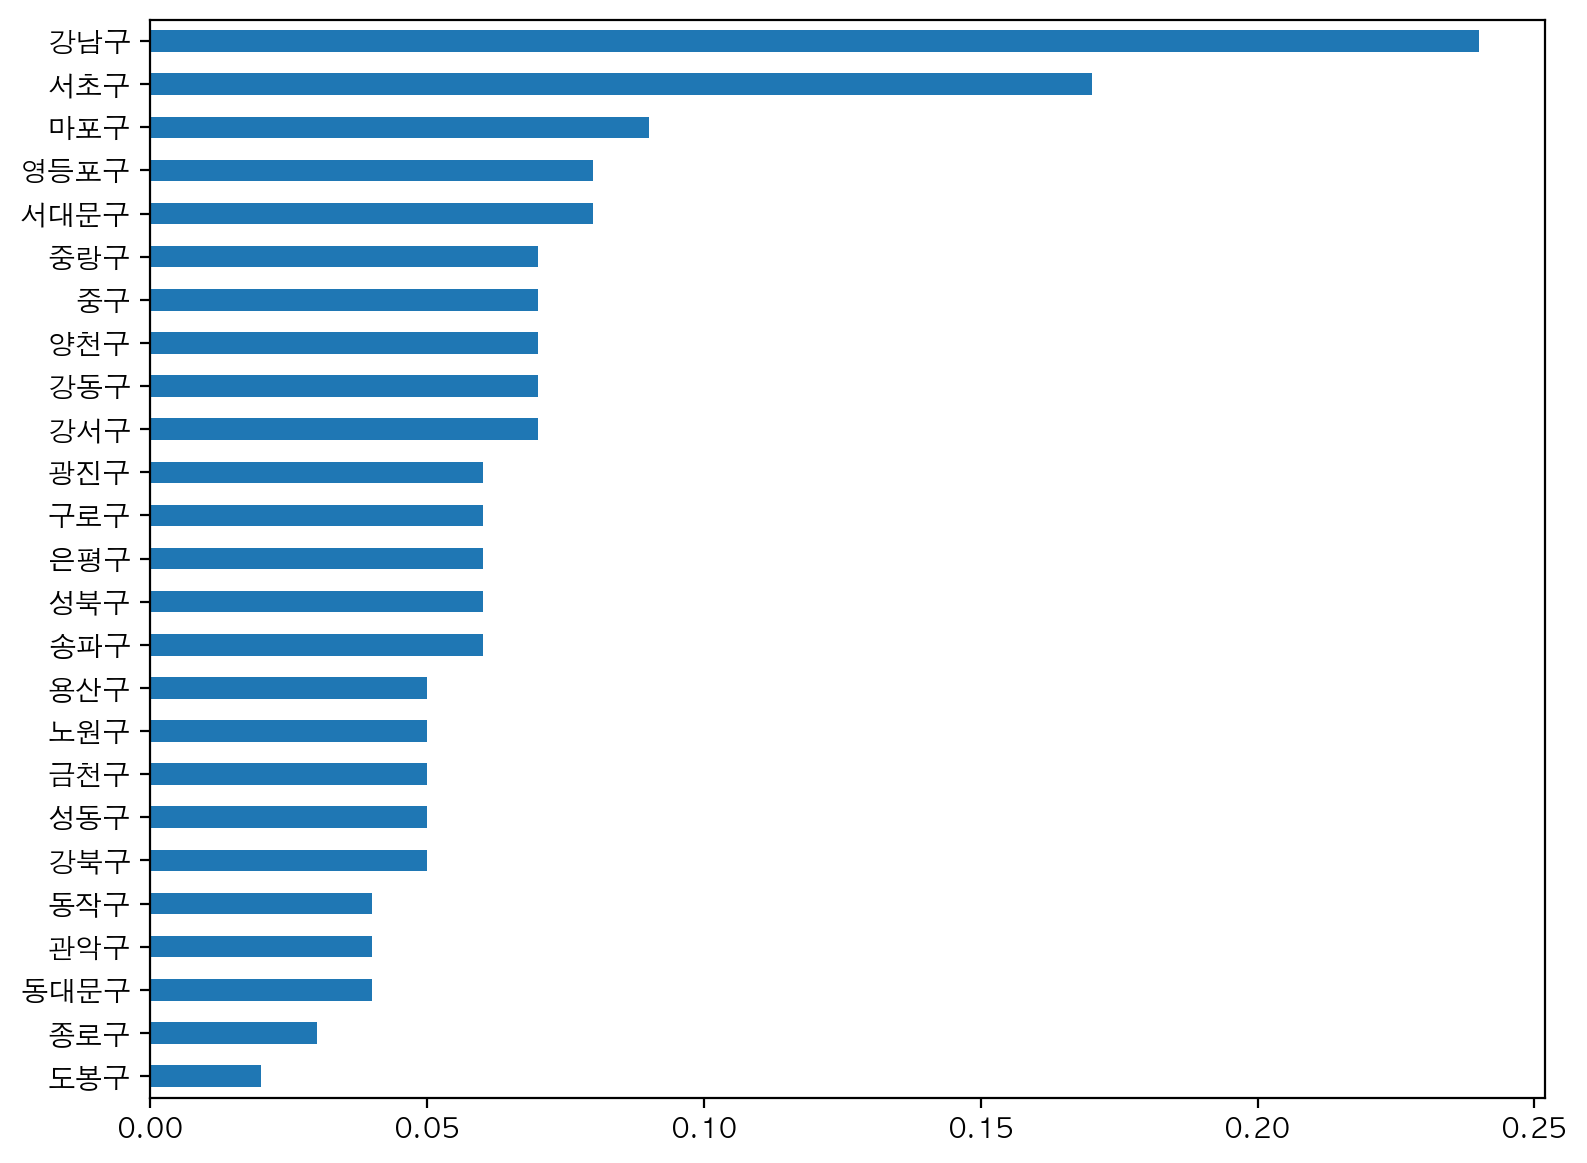

In [11]:
import folium


# 서울에 소재한 병원 중 상권업종소분류명에 "피부" 나 "성형"이 들어간 분류명을 찾아 구하기

# 서울 소재 병원 찾기 : 시도명이 "서울특별시"이면서 상권업종중분류명이 '병원'인 데이터 찾기
# copy()함수를 사용하여 'df_seoul' 변수에 깊은 복사로 담기 : 원본과 다른 별도의 index 사용
df_seoul_hospital = df[(df["시도명"] == "서울특별시") &
                       (df["상권업종중분류명"].str.contains("병원"))].copy()

# info()함수 요약정보에서 서울 소재 병원수 확인
df_seoul_hospital.info()
# 서울소재 병원 13406개 확인 : 13406 entries


# df_seoul_hospital_cnt에 서울소재 병원수 담기
df_seoul_hospital_cnt = df_seoul_hospital["시군구명"].value_counts()
df_seoul_hospital_cnt.head()


# 서울 소재 병원에서 상권업종소분류명에 '피부'나 '성형'이 들어간 분류명 찾아서 구하기
df_beauty_medi = df_seoul_hospital[df_seoul_hospital["상권업종소분류명"].str.contains("피부|성형")]
# df_beauty_cnt에 서울소재 피부과 성형외과 원수 담기
df_beauty_cnt = df_beauty_medi["시군구명"].value_counts()
df_beauty_cnt



# 서울시의 시군구별 피부과 성형외과 수의 비율 구하기

# 피부과 성형외과 수 (df_beauty_cnt) / 전체병원 수 (df_seoul_hospital_cnt)로 비율을 구하기
df_seoul_beauty = df_beauty_cnt / df_seoul_hospital_cnt
# round()함수를 사용하여 숫점 두 번째짜리까지 출력하기
# sort_values()함수를 사용하여 비율이 높은 순서대로 정렬(내림차순 정렬)하기
df_seoul_beauty.round(2).sort_values(ascending=False)


# 시각화 표현으로 피부과나 성형외과가 다른 지역에 비해 전체 병원 수 중에서 어느 정도의 비율을 차지하고 있는지 확인
# matplotlib.pyplot 라이브러리를 사용하여 barh 차트를 시각화 표현
df_seoul_beauty.round(2).sort_values(ascending=True).plot.barh(figsize=(9,7))

### Q4. 평균 기대수명이 점점 길어지면서 실버 의료 산업도 주목받고 있습니다. 여러분은 실버 의료 산업과 관련된 스타트업에 취업했습니다. 지도를 시각화하여 '노인/치매병원'이 주로 어디에 위치하고 있는지를 찾아보고자 합니다.

* folium 을 통해 지도에 전국의 '노인/치매병원'을 표시해 주세요!
* 다음과 같이 시각화 하며, folium 의 문서를 참고하여 다른 기능을 사용하여 좀 더 멋지게 지도를 꾸며도 좋습니다.
* folium 문서 : https://python-visualization.github.io/folium/quickstart.html

<AxesSubplot: xlabel='count', ylabel='시도명'>

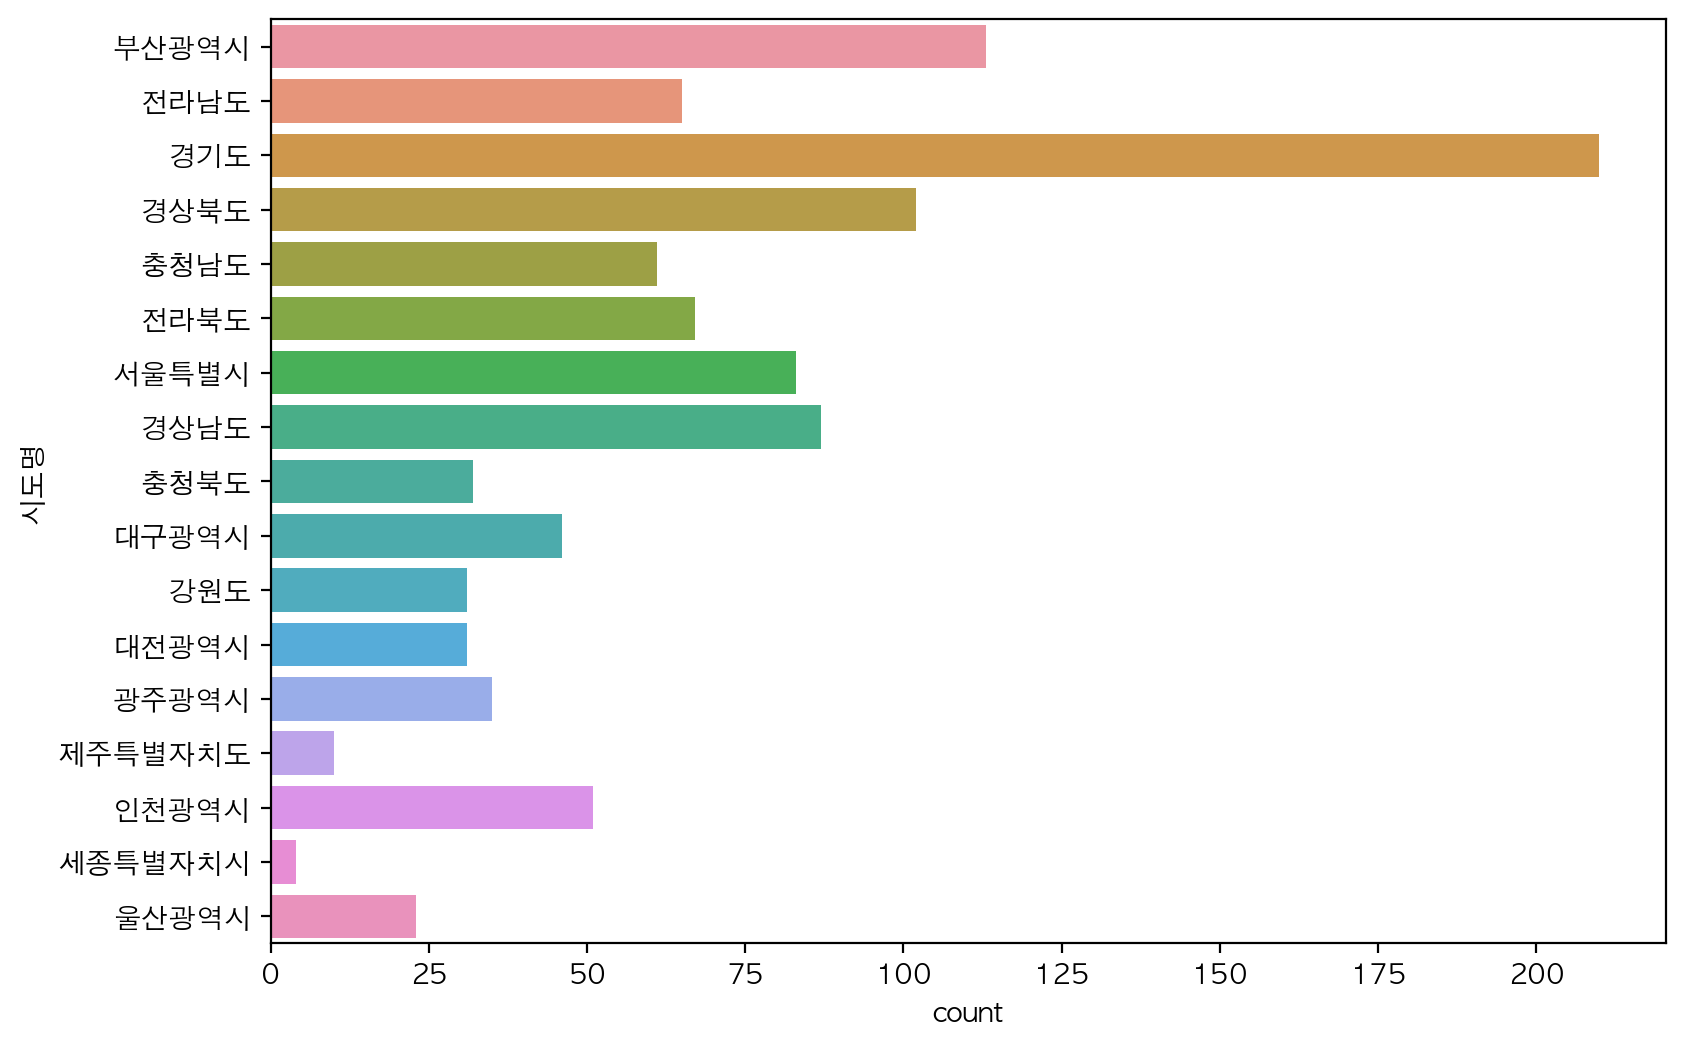

In [12]:
# unique() 함수 이용하여 '노인/치매 병원'의 카테고리 확인 
df["상권업종소분류명"].unique()


# 노인 치매 병원 추출하여 df_old_hospital 변수에 담기
df_old_hospital = df[df['상권업종소분류명']=='노인/치매병원']

# geo_df 에 df_old_hospital 을 copy()로 복사해서 할당합니다.
geo_df = df_old_hospital.copy()


# folium 라이브러리로 지도 시각화 하기
# 지도의 중심을 지정하기 위해 위도와 경도의 평균을 구합니다.
# 처음에 대한민국 지도 사이즈로 출력되도록 zoom_start=7로 설정
fmap = folium.Map(location=[geo_df["위도"].mean(), geo_df["경도"].mean()], 
                 zoom_start=7)
# 툴팁 기능 삽입을 위해 for문 내에서 folium.Marker().add_to()함수 사용
for n in geo_df.index:
    # 팝업에 들어갈 텍스트를 지정해 줍니다.
    # 지역과 상호를 붙여서 출력되도록 합니다.
    name = geo_df.loc[n, "상호명"]
    address = geo_df.loc[n, "시도명"]
    popup = f"{address}-{name}"
    location = [geo_df.loc[n, "위도"], geo_df.loc[n, "경도"]]
    folium.Marker(
        location = location,
        popup = popup,        
    ).add_to(fmap)
fmap



# '노인/치매병원'이 많은 지역 확인하기
# folium 지도 시각화로는 전국에서 어느 지역에 '노인/치매병원'이 많은지 구분이 안됨
# seaborn 시각화의 bar 차트를 통해 확인

# seaborn 라이브러리 사용
# 이미지 속성 설정
plt.figure(figsize=(9, 6))
sns.countplot(data=geo_df, y="시도명")